In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

#### Loading dataset


In [86]:
df = pd.read_csv('/Users/prabhpreet16/Downloads/IML2/Country-data.csv')

# examining the the dataset
print(df.head())
print(df.info())
print(df.describe())


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-nul

##### No null values, good start, everything looks good, no cleaning required

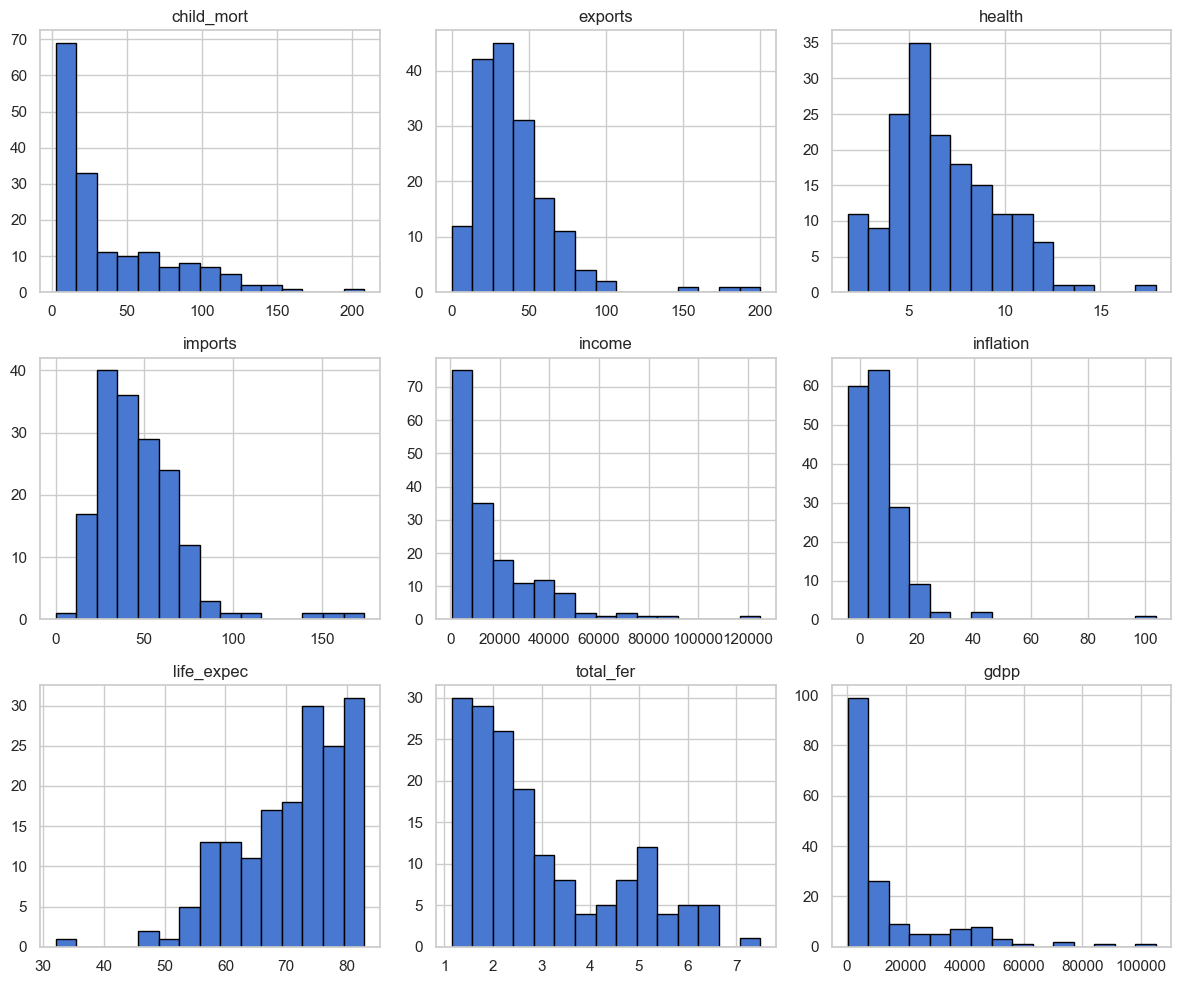

In [87]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=15, edgecolor='black') #Pure dataframe ka histogram ek baar mein, kya baat hai
plt.tight_layout()
plt.show()


##### Hope that helped you Mr. Grader, histogram were very insightful


In [88]:
features = ['child_mort', 'health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features]) #extracting the features and scaling them

df_scaled = pd.DataFrame(df_scaled, columns=features) #and then adding them back to the dataframe
df_scaled


,child_mort,health,income,inflation,life_expec,total_fer,gdpp
0,1.291532,0.279088,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.097016,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.966073,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-1.448071,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.286894,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...
162,-0.225578,-0.571711,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.695862,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,0.008877,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.597272,-0.658924,1.500916,-0.344633,1.140944,-0.637754


#### Defining helper funtion to calculate euclidean distance, initialising centroids, assiging clusters, updating centroids and convergence satisfying criteria

In [89]:
X = df_scaled.values #converting to numPy array for simpler calculations

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def initialize_centroids(X, k):
    np.random.seed()
    indices = np.random.choice(X.shape[0], k, replace=False) #randomly chossing 4 unique datapoints as centroids
    return X[indices]

def assign_clusters(X, centroids):

    cluster_assignments = []

    for point in X:
        distances = []
        
        # Calculate distance from the point to each centroid
        for centroid in centroids:
            distance = euclidean_distance(point, centroid)
            distances.append(distance)
        
        # Find the index of the closest centroid
        closest_cluster = np.argmin(distances)
        
        # Assign the point to that cluster
        cluster_assignments.append(closest_cluster)

    # Return the final cluster labels
    return np.array(cluster_assignments)


def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        points = X[clusters == i]
        if len(points) == 0:  # empty cluster
            new_centroids.append(X[np.random.randint(0, X.shape[0])]) # then assign a new data point as a cluster randomly
        else:
            new_centroids.append(points.mean(axis=0)) # else take the mean of the cluster as the new centroid
    return np.array(new_centroids)


def compute_distortion(X, labels, centroids):
    distortion = 0
    for i in range(len(X)):
        centroid = centroids[labels[i]] 
        distortion += np.linalg.norm(X[i] - centroid) ** 2  # total distorition calculated from every point
    return distortion



### Now with all the set up done, we implement the algorithm

In [90]:
def kmeans(X, k=4, max_iters=100): #capping iterations at 100
    centroids = initialize_centroids(X, k) #randomly initialising
    
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        
            
        centroids = new_centroids
    
    return clusters, centroids


#### Now, we run the algorithm with 5 random initialisations and select the one with lowest distortion

In [91]:

best_labels = None
best_centroids = None
lowest_distortion = float('inf')

for i in range(5):
    print(f"\nInitialization {i+1}:")
    
    clusters, centroids = kmeans(X, k=4)
    

    
    # Show cluster labels for current run
    print("Cluster Labels:\n", clusters)
    
    # Show centroid coordinates for current run
    print("Centroids (in standardized feature space):\n", centroids)
    
    # Show distortion for current run
    distortion = compute_distortion(X, clusters, centroids) 
    print(f"Run {i+1} Distortion: {distortion:.2f}") 
    
    if distortion < lowest_distortion: # min distortion calculation
        lowest_distortion = distortion
        best_labels = clusters
        best_centroids = centroids

print("\n Best clustering selected with lowest distortion.")
lowest_distortion






Initialization 1:
Cluster Labels:
 [2 0 1 2 0 1 1 3 3 1 0 0 1 0 1 3 1 2 1 1 0 2 0 3 0 2 2 1 2 3 1 2 2 0 1 0 2
 2 2 0 2 0 0 0 3 1 0 1 1 2 2 0 1 3 3 2 2 0 3 2 0 1 1 2 2 1 2 0 3 1 1 1 2 3
 0 3 1 3 1 1 2 2 3 1 2 0 0 2 2 1 0 3 0 2 2 1 0 2 0 2 0 0 0 1 0 1 2 1 2 1 3
 3 2 2 3 1 2 0 1 1 1 0 0 3 1 1 2 1 1 2 0 1 2 3 0 0 2 2 0 0 1 1 2 1 3 3 1 2
 1 2 2 1 1 0 1 2 1 3 3 3 0 1 1 1 1 2 2]
Centroids (in standardized feature space):
 [[-0.68431796  0.50958914  0.1028764  -0.45078792  0.66844951 -0.77947236
   0.0238098 ]
 [-0.29019615 -0.6295265  -0.31304077  0.18970451  0.12049679 -0.27618809
  -0.43298549]
 [ 1.32661038 -0.13954094 -0.68923797  0.39181237 -1.27627565  1.3543418
  -0.60496339]
 [-0.82535953  0.81235321  1.83490271 -0.44078081  1.12065697 -0.75661421
   2.05868267]]
Run 1 Distortion: 467.32

Initialization 2:
Cluster Labels:
 [1 0 3 1 0 0 3 2 2 3 0 0 3 0 3 2 3 1 3 3 0 1 0 2 0 1 1 3 1 2 3 1 1 0 3 0 1
 1 1 0 1 0 0 0 2 3 0 3 0 1 1 0 3 2 2 3 1 0 2 1 0 0 3 1 1 3 1 0 2 3 3 3 3 2
 0 2 3 2 0 3 

np.float64(461.8906791390412)

#### So, choosing the clustering with lowest distortion rates is leading to an unexpected problem, which is that this minimum distorition pick is favouring clusterings with less countries for one of the clusters: In the above run, the lowest distorition was from a clustering where one of the clusters had just 1 country. The rest of the clusters are fine, but this specific instance leads to lower distortion rates and is getting preferred.

#### But this issue appears only sometimes on different random initialisations. This suggests the potential of an outlier in the data such that whenever that data point is fixed, it is so far away from the rest that the most favourable outcome for the algorithm is to have that country be its own cluster every single time.

### We move on to analysis with scatterplots

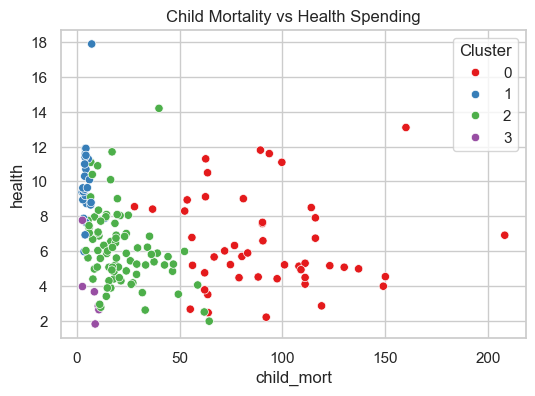

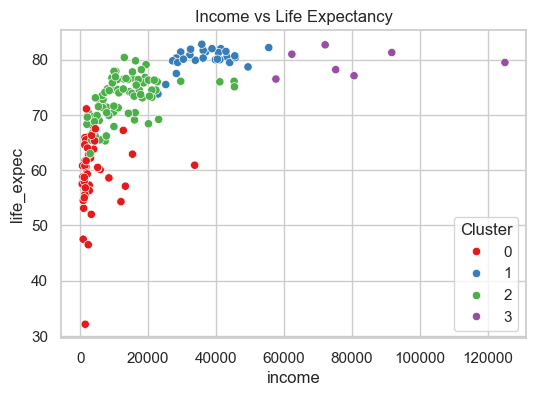

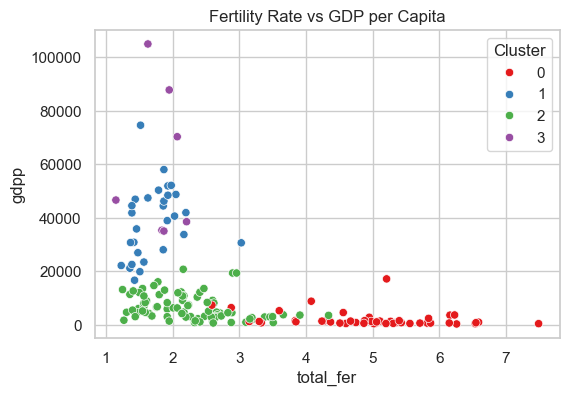

In [92]:
# Add cluster labels to the original DataFrame
df['Cluster'] = best_labels

# Set consistent style
sns.set(style="whitegrid", palette="muted")

# Plot 1: child_mort vs. health
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='child_mort', y='health', hue='Cluster', palette='Set1')
plt.title('Child Mortality vs Health Spending')
plt.show()

# Plot 2: income vs. life_expec
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='income', y='life_expec', hue='Cluster', palette='Set1')
plt.title('Income vs Life Expectancy')
plt.show()

# Plot 3: total_fer vs. gdpp
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='total_fer', y='gdpp', hue='Cluster', palette='Set1')
plt.title('Fertility Rate vs GDP per Capita')
plt.show()


In [93]:
# Group by the 'Cluster' column and calculate summary statistics
cluster_summary = df.groupby('Cluster').agg({
    'country': 'count',       # Number of countries in the cluster
    'child_mort': 'mean',     # Average child mortality
    'health': 'mean',         # Average health spending
    'income': 'mean',         # Average income
    'inflation': 'mean',      # Average inflation
    'life_expec': 'mean',     # Average life expectancy
    'total_fer': 'mean',      # Average fertility rate
    'gdpp': 'mean'            # Average GDP per capita
}).rename(columns={'country': 'num_countries'})



cluster_summary


,num_countries,child_mort,health,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,
0,48,91.610417,6.433542,3897.354167,11.911146,59.239583,4.992083,1909.208333
1,29,4.741379,9.925862,36603.448276,1.083724,80.210345,1.726897,38572.413793
2,83,21.790361,6.137470,12651.686747,7.704807,72.974699,2.287831,6461.108434
3,7,6.814286,4.592857,80642.857143,8.129143,79.471429,1.817143,59785.714286
